In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [64]:
# Lecture du jeu de données
df = pd.read_table("heart.txt")
df.head()

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100,234,A,A,156,non,1,1,B,presence
1,41,feminin,130,204,A,C,172,non,14,1,A,absence
2,58,masculin,150,270,A,C,111,oui,8,1,A,presence
3,53,masculin,140,203,B,C,155,oui,31,3,A,presence
4,41,masculin,130,214,A,C,168,non,20,2,A,absence


In [65]:
# Informations sur le jeu de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         270 non-null    int64 
 1   sexe        270 non-null    object
 2   pression    270 non-null    int64 
 3   cholester   270 non-null    int64 
 4   sucre       270 non-null    object
 5   electro     270 non-null    object
 6   taux_max    270 non-null    int64 
 7   angine      270 non-null    object
 8   depression  270 non-null    int64 
 9   pic         270 non-null    int64 
 10  vaisseau    270 non-null    object
 11  coeur       270 non-null    object
dtypes: int64(6), object(6)
memory usage: 25.4+ KB


In [66]:
# Affichage des variables quantitatives
df.select_dtypes(include=np.number).columns

Index(['age', 'pression', 'cholester', 'taux_max', 'depression', 'pic'], dtype='object')

In [67]:
# Affichage des variables qualitatives
df.select_dtypes(include='object').columns

Index(['sexe', 'sucre', 'electro', 'angine', 'vaisseau', 'coeur'], dtype='object')

In [68]:
df['sexe'].value_counts()

masculin    183
feminin      87
Name: sexe, dtype: int64

In [69]:
df['sucre'].value_counts()

A    230
B     40
Name: sucre, dtype: int64

In [70]:
df['electro'].value_counts()

C    137
A    131
B      2
Name: electro, dtype: int64

In [71]:
df['angine'].value_counts()

non    181
oui     89
Name: angine, dtype: int64

In [72]:
df['vaisseau'].value_counts()

A    160
B     58
C     33
D     19
Name: vaisseau, dtype: int64

In [73]:
df['coeur'].value_counts()

absence     150
presence    120
Name: coeur, dtype: int64

In [74]:
# Vérifier si il y a présence de valeur manquante
df.isna().sum()

age           0
sexe          0
pression      0
cholester     0
sucre         0
electro       0
taux_max      0
angine        0
depression    0
pic           0
vaisseau      0
coeur         0
dtype: int64

In [75]:
# Vérifier s'il y a des doublons
df.duplicated().sum()

0

## Analyse des variables quantitatives

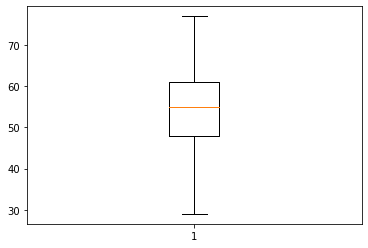

In [76]:
# visualisation avec matplotlib
plt.boxplot(df['age'])
plt.show()

On constate que la majorité (50%) des individus ayant passé le test, ont un age compris entre environ 48 et 62 ans, 25% ont un age compris entre 30 et 48 ans et 25% ont plus de 62 ans. On peut ainsi dire que la majorité des personnes qui ont effectué le test était des adultes.

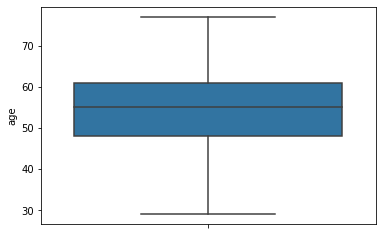

In [77]:
# Visualisation avec seaborn
sns.boxplot(y=df['age'])
plt.show()

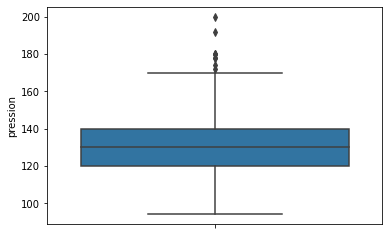

In [78]:
sns.boxplot(y=df['pression'])
plt.show()

50% des individus ont une pression comprise entre 120 et 140, 25% ont une pression comprise entre 95 et 120, 25% ont une pression comprise entre 140 et 170. Il existe des individus qui ont une pression qui ne sont pas comprises dans les intervalles cités précédemment, ces individus constituent les outliers (valeurs aberrantes).

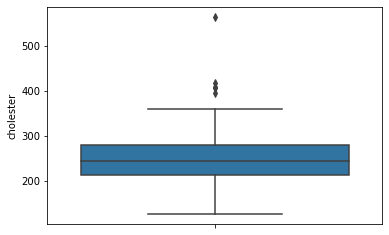

In [79]:
sns.boxplot(y=df['cholester'])
plt.show()

50% des individus ont un taux de cholesterol compris entre 200 et 300, 25% des individus ont un taux de cholestérol inférieur à 200 et environ 25% ont un taux supérieur à 300.

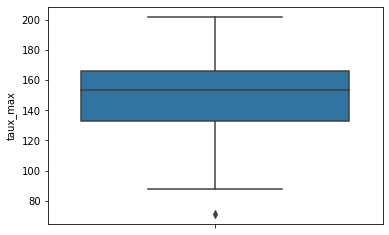

In [80]:
sns.boxplot(y=df['taux_max'])
plt.show()

50% des individus ont un taux maximal compris entre 135 et 165, 25% des individus ont un taux maximal inférieur à 135 et 25% ont un taux maximal supérieur à 165.

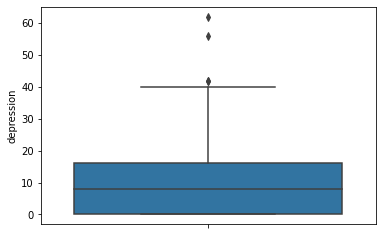

In [81]:
sns.boxplot(y=df['depression'])
plt.show()

La majorité des individus ont un taux de dépression compris entre 0 et 18.

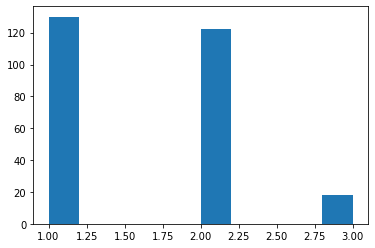

In [82]:
plt.hist(df['pic'])
plt.show()

In [83]:
df['pic'].value_counts()

1    130
2    122
3     18
Name: pic, dtype: int64

La majorité des individus ont un pic égale à 1 et un petit groupe d'individu ont un pic égale à 3.

## Analyse des variables qualitatives

In [100]:
df['sexe'].value_counts()

masculin    183
feminin      87
Name: sexe, dtype: int64

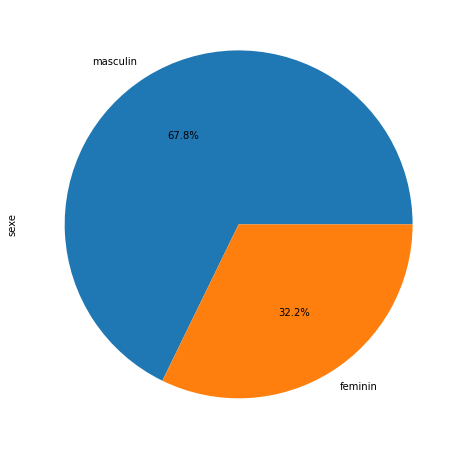

In [108]:
plt.figure(figsize=(16,8))
df['sexe'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

La majorité des individus de notre jeu de données sont de sexe masculin.

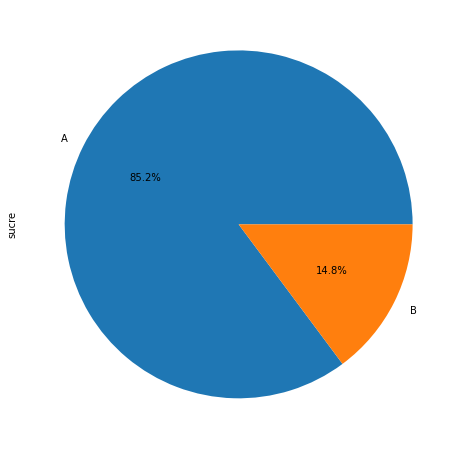

In [110]:
plt.figure(figsize=(16,8))
df['sucre'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

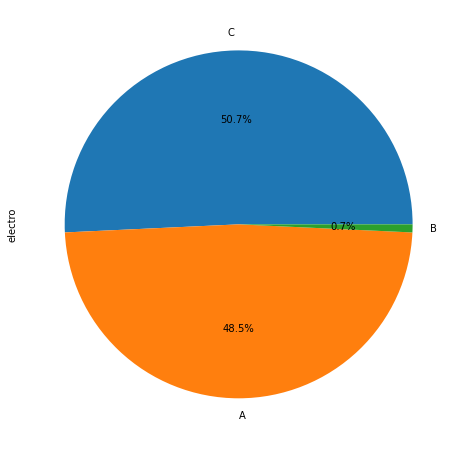

In [111]:
plt.figure(figsize=(16,8))
df['electro'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

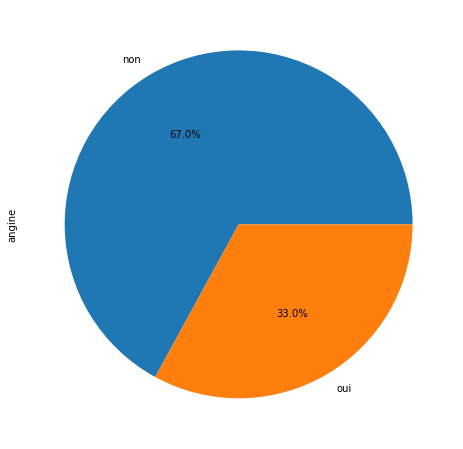

In [107]:
plt.figure(figsize=(16,8))
df['angine'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

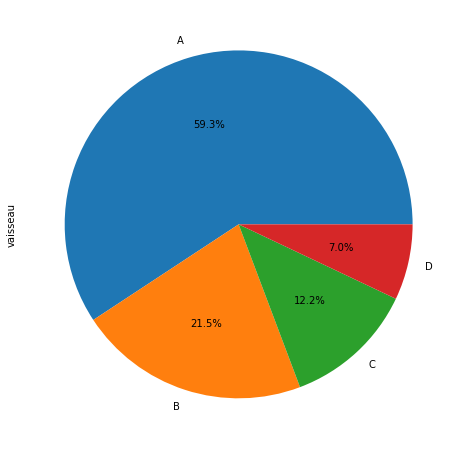

In [106]:
plt.figure(figsize=(16,8))
df['vaisseau'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

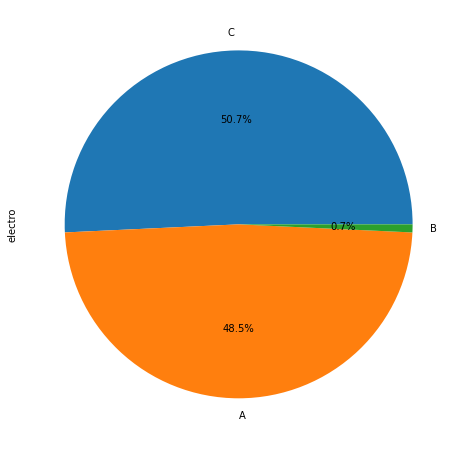

In [105]:
plt.figure(figsize=(16,8))
df['electro'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

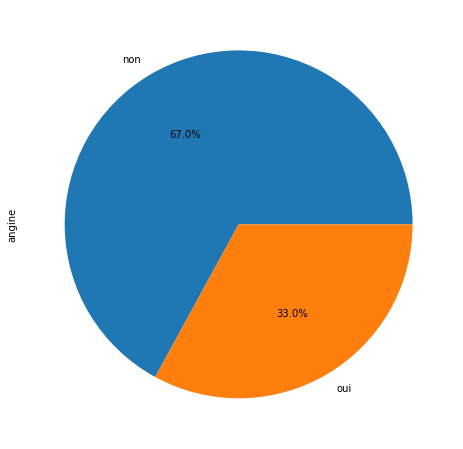

In [112]:
plt.figure(figsize=(16,8))
df['angine'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

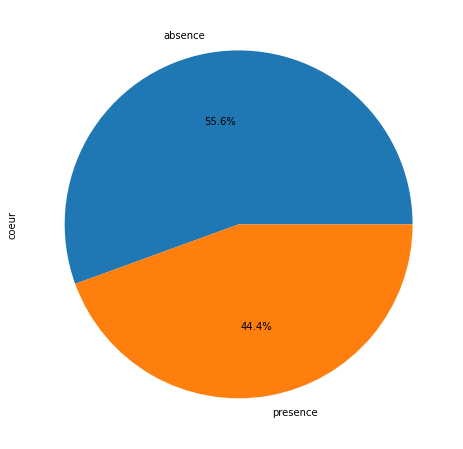

In [113]:
plt.figure(figsize=(16,8))
df['coeur'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

## Analyse des variables deux à deux

In [116]:
# Affichage des variables quantitatives
df.select_dtypes(include=np.number).columns

Index(['age', 'pression', 'cholester', 'taux_max', 'depression', 'pic'], dtype='object')

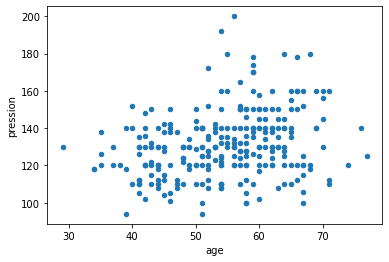

In [144]:
# Affichage avec matplotlib
df.plot.scatter(x="age", y="pression")
plt.show()

On observe plus de pression artérielles chez les individus dont l'age varie entre 40 et 70 ans. Les pressions artérielles les plus élevées se retrouvent chez les individus qui ont un age compris entre 50 et 60 ans.

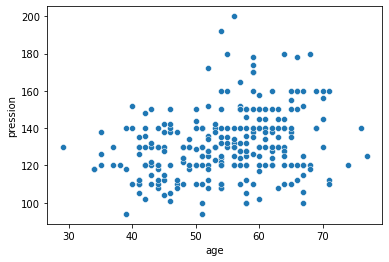

In [139]:
sns.scatterplot(x='age', y='pression', data=df)
plt.show()

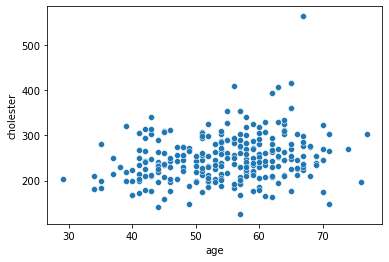

In [138]:
sns.scatterplot(x='age', y='cholester', data=df)
plt.show()

Chez les individus dont l'age varie entre 0 et 40 ans et les individus dont l'age est >70, le taux de cholestérol est < à 350. On observe plus de pression artérielles chez les individus dont l'age varie entre 40 et 70.

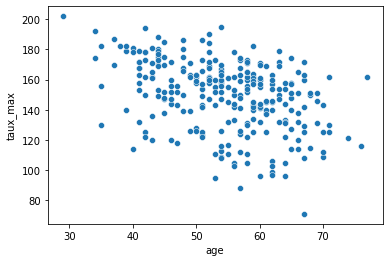

In [140]:
sns.scatterplot(x='age', y='taux_max', data=df)
plt.show()

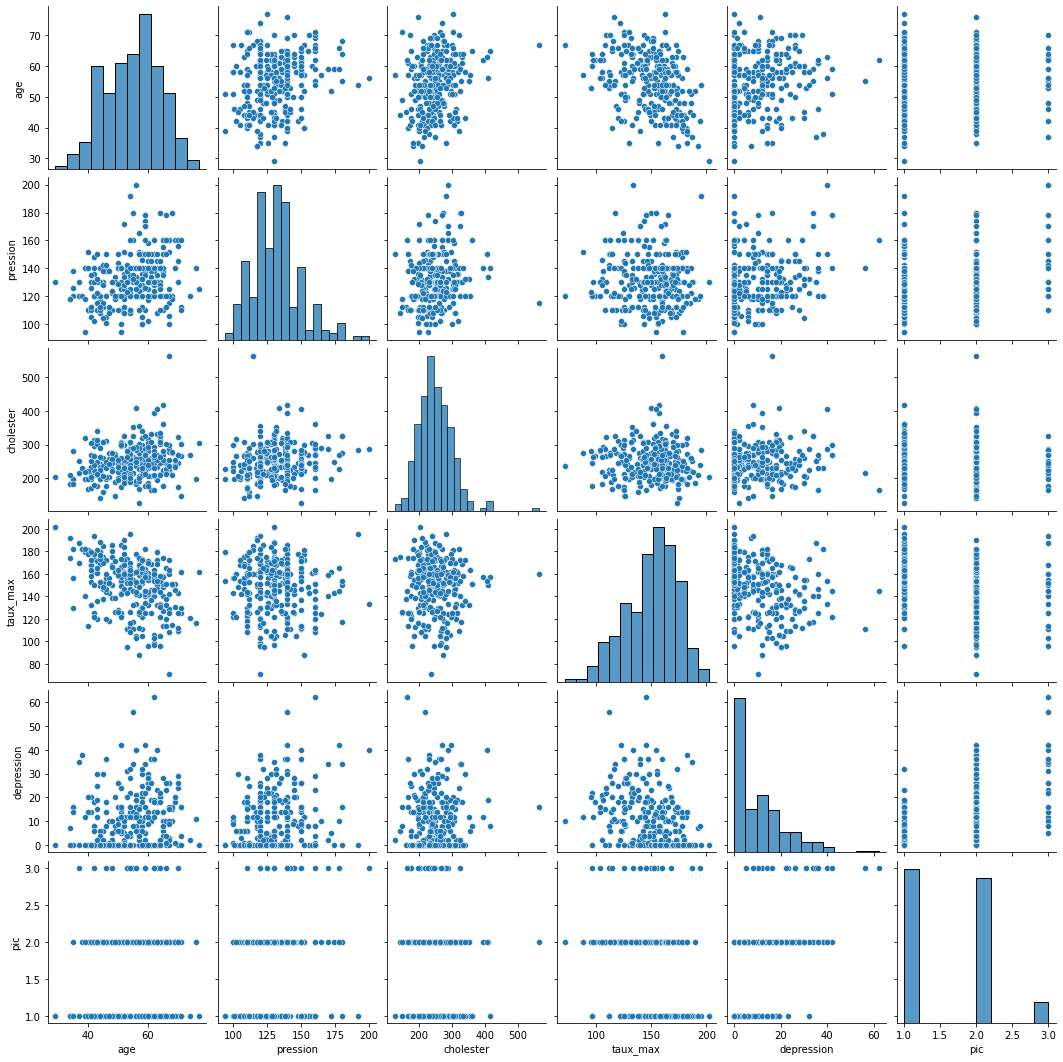

In [117]:
# Visualisation des différentes liaisons entre les variables quantitatives
sns.pairplot(df)
plt.show()

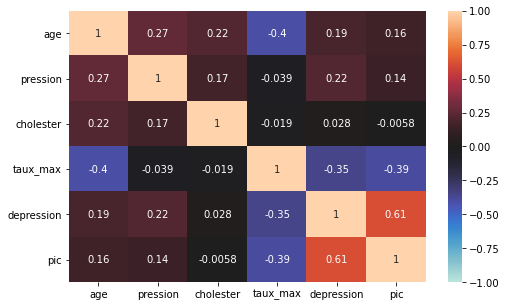

In [148]:
# Création d'une nouvelle figure, l'attribut figsize specifie la largeur et la hauteur de la figure
plt.figure(figsize=(8,5))

# Etablissement des correlations entre les differentes var de notre jeu de donnees
corr = df.corr()

#Fonction de seaborn à retenir, heatmap() attribut : vmin,vmax,annot,center,a correlation entre les variables.
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

On remarque ici que la dépression a plus d'influence sur le pic.

## Analyse de certaines variables qualitatives deux à deux

In [125]:
# Affichage des variables qualitatives
df.select_dtypes(include=object).columns

Index(['sexe', 'sucre', 'electro', 'angine', 'vaisseau', 'coeur'], dtype='object')

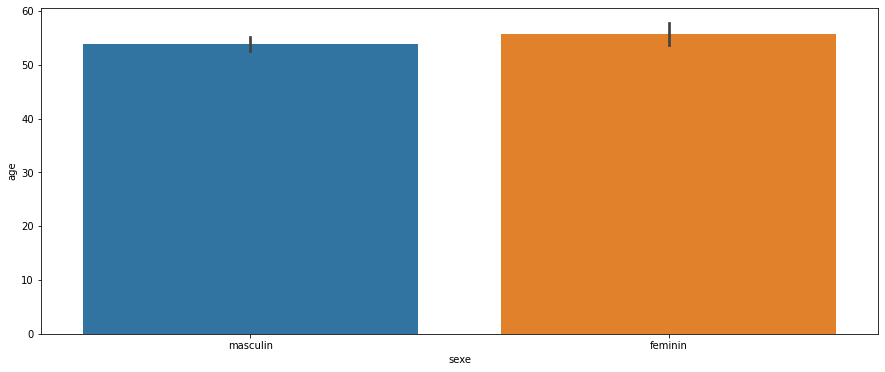

In [130]:
plt.figure(figsize=(15,6))
sns.barplot(x='sexe',y='age', data=df)
plt.show()

On remarque ici que l'age varie entre 0 et 60 ans pour les individus de sexe masculin et ceux de sexe féminin. La population la plus agée est la population féminine.

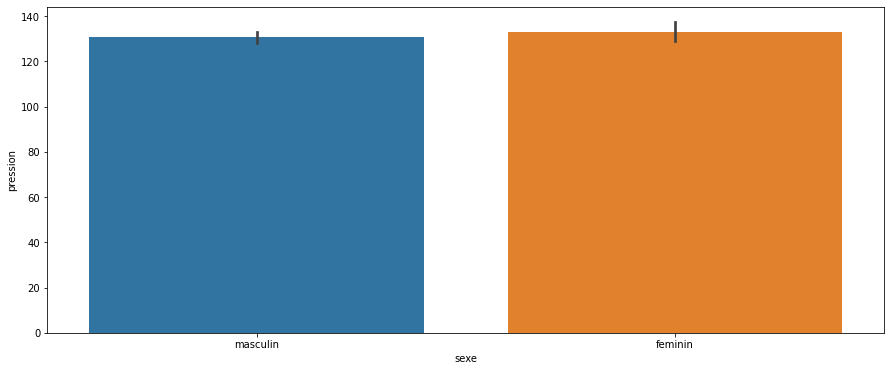

In [134]:
plt.figure(figsize=(15,6))
sns.barplot(x='sexe',y='pression', data=df)
plt.show()

De façon globale, la pression artérielle est pratiquement la meme quelque soit le sexe.

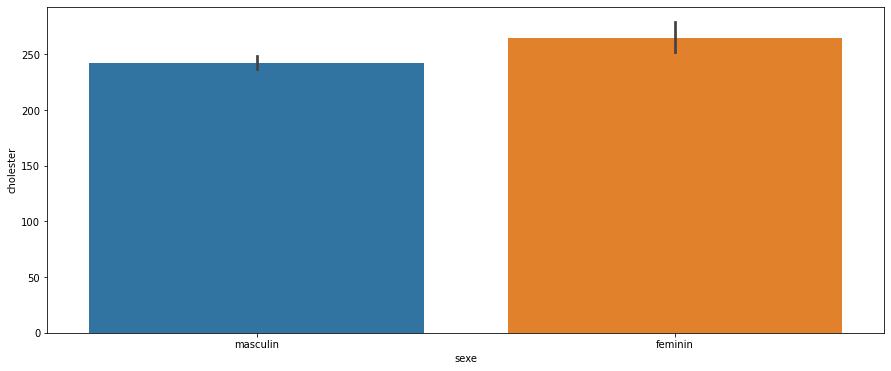

In [132]:
plt.figure(figsize=(15,6))
sns.barplot(x='sexe',y='cholester', data=df)
plt.show()

Le taux de cholestérol est beaucoup plus élevé chez les femmes que chez les hommes.

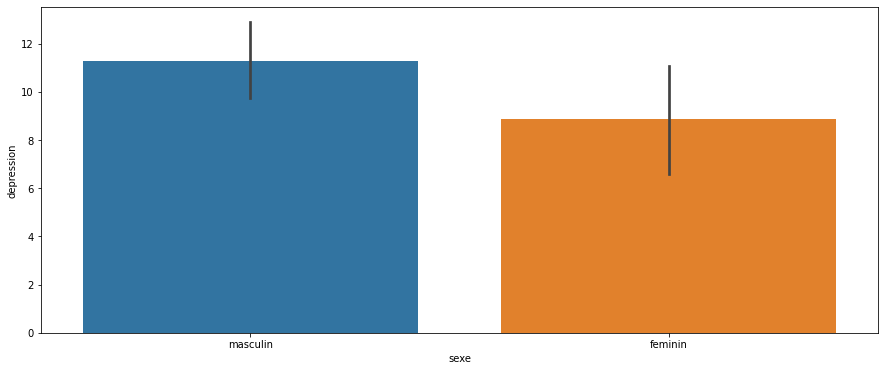

In [133]:
plt.figure(figsize=(15,6))
sns.barplot(x='sexe',y='depression', data=df)
plt.show()

Les hommes sont beaucoup plus dépressif par rapport aux femmes.

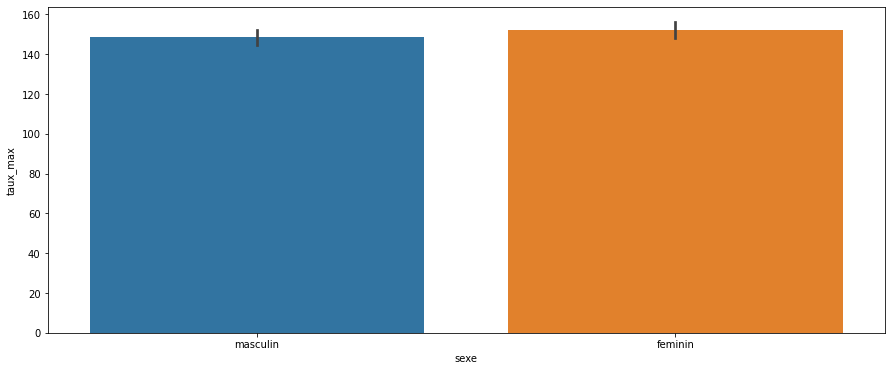

In [136]:
plt.figure(figsize=(15,6))
sns.barplot(x='sexe',y='taux_max', data=df)
plt.show()

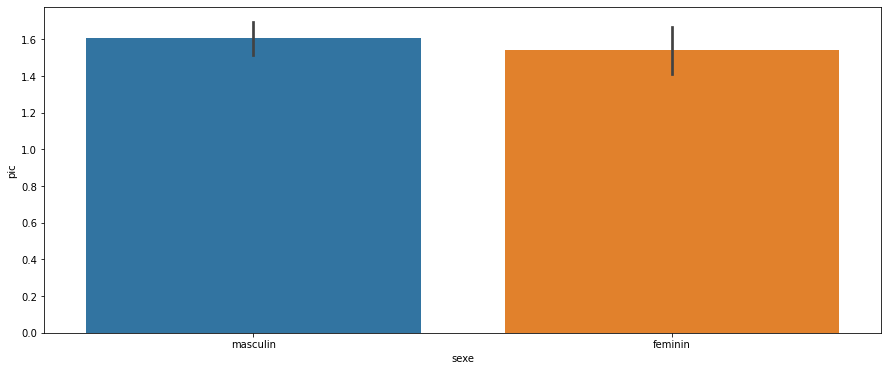

In [137]:
plt.figure(figsize=(15,6))
sns.barplot(x='sexe',y='pic', data=df)
plt.show()

## Régression Logistique

In [155]:
df_copy = df.copy()

In [157]:
# Encodage de la variable cible
df_copy['coeur']=df_copy['coeur'].map({'absence':0,'presence':1})

In [158]:
df_copy.head()

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100,234,A,A,156,non,1,1,B,1
1,41,feminin,130,204,A,C,172,non,14,1,A,0
2,58,masculin,150,270,A,C,111,oui,8,1,A,1
3,53,masculin,140,203,B,C,155,oui,31,3,A,1
4,41,masculin,130,214,A,C,168,non,20,2,A,0


In [168]:
# Encodage des variables qualitatives sucre, electro, vaisseau
encodage = LabelEncoder()
liste_quali=df_copy.select_dtypes(object).columns
for i in liste_quali:
    df_copy[i] = encodage.fit_transform(df_copy[i])
df_copy

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,1,100,234,0,0,156,0,1,1,1,1
1,41,0,130,204,0,2,172,0,14,1,0,0
2,58,1,150,270,0,2,111,1,8,1,0,1
3,53,1,140,203,1,2,155,1,31,3,0,1
4,41,1,130,214,0,2,168,0,20,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
265,62,0,140,268,0,2,160,0,36,3,2,1
266,62,1,130,231,0,0,146,0,18,2,3,0
267,64,1,110,211,0,2,144,1,18,2,0,0
268,63,0,150,407,0,2,154,0,40,2,3,1


### Segmentation du dataset

In [174]:
X = df_copy.iloc[:,:-1]
y=df_copy.iloc[:,-1]

## Creation et entrainement du modèle

In [175]:
# Diviser le dataset entre le Training set et le Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [176]:
model_logistic = LogisticRegression(random_state = 0, solver='liblinear')
model_logistic.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

## Evaluation

In [177]:
# Score du model
score=model_logistic.score(X_test,y_test)
score

0.8382352941176471